## k-Nearest-Neighbors classifier notes

The kNN is a robust supervised learning classifier with many applications, and serves as benchmark for more advanced algorithms like SVM.

Let $f: X \rightarrow Y$ be the function of obersvations $(x,y)$ we are interesting in learning. Given a new observation $x'$, the KNN algorithm steps as:


1. For some metric $d$, compute $d(x',x) \ \forall x\in X$, and keep K closest ones. An odd K means no ties. Call the obtained points set $\mathcal{A}$.
1. compute conditional probabilities for each possible class given x'
\begin{align}
P(y = j | x') = \frac{1}{K}\sum_{x\in \mathcal{A}} I(y(x) = j)
\end{align}
where $I(Z)$ is the indicator function which evalues to $1$ if $Z$ is true, $0$ otherwise.
1. $x' \rightarrow y$ for $y$ with largest probability $P$.


Note that the above algorithm makes no assumptions on the function $h$ we are trying to learn. This quality is called being nonparametric. Being nonparametric can be blunt but it also means we will not start off with erroneous assumptions on the model.

Also, this modelling is instance-based which means we are not learning the explicit form a of model. kNN simply memorizes the data and uses it to make predictions. We see that there is no actual training done. It memorizes the data then we query.




### Geometrical meaning of k

K controls the shape and level of smoothness of the decision boundary. The smaller k gets, the more jagged the classifier's decision boundary becomes since observations are more local. Large values mean more averaging when computing the probability classes and hence a smoother boundary.

Let's bring in some data to demonstrate the above. You can just fast forward to the plots below. One is created with k = 1, and the other with k = 2.

In [51]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

iris = datasets.load_iris()

print(iris['target_names'])
print(iris['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
#models built on petal qualities
X = iris.data[:,2:4]
KNC_1 = KNeighborsClassifier(n_neighbors=1).fit(X,iris.target)
KNC_10 = KNeighborsClassifier(n_neighbors=10).fit(X,iris.target)

In [60]:
x1_min, x1_max = X[:,0].min() - 0.2, X[:,0].max() + 1
x2_min, x2_max = X[:,1].min() - 0.2, X[:,1].max() + 1

In [61]:
h=.01
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

#flatten each array to put pair to get (x,y) grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]

In [62]:
Z1 = KNC_1.predict(mesh_points)
Z10 = KNC_10.predict(mesh_points)

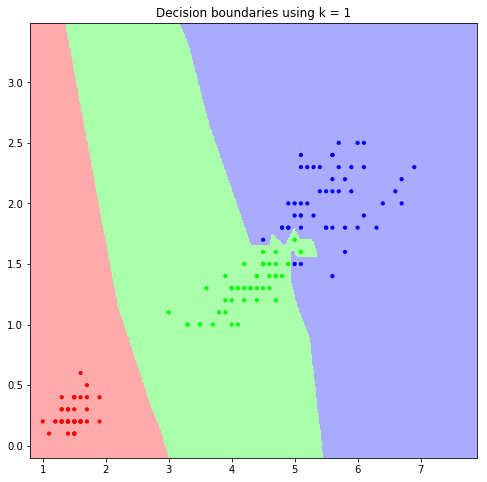

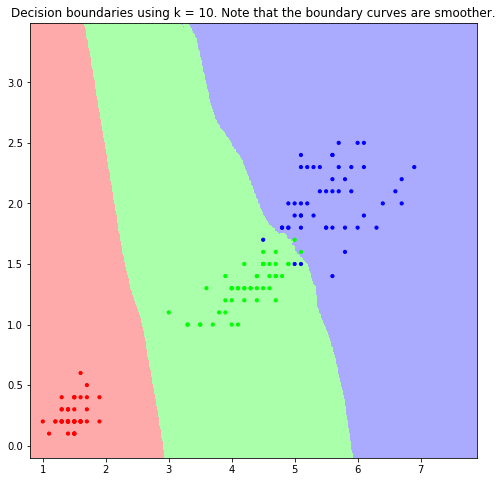

In [71]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z1 = Z1.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.title('Decision boundaries using k = 1')
plt.pcolormesh(xx, yy, Z1,cmap=cmap_light)

# plotting the training data points
plt.scatter(X[:,0],X[:,1],c=iris.target,s=10,cmap=cmap_bold)
plt.show()

Z10 = Z10.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.title('Decision boundaries using k = 10. Note that the boundary curves are smoother.')
plt.pcolormesh(xx,yy,Z10,cmap=cmap_light)
# plotting the training data points
plt.scatter(X[:,0],X[:,1],c=iris.target,s=10,cmap=cmap_bold)
plt.show()

## Code for a simple knn classifier

We code a knn classifier and test it using the sklearn's iris dataset. This is an exercise to understand the knn algorithm.

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from collections import Counter

Let's get a training-testing split:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target)

The training phase is already done since it involves memorizing the training data.

Let's write the prediction function. It takes as input a new observation x_test, and it outputs its label.

In [87]:
def predict(X_train, y_train, x_test, k):
    
    distances = []  # to store distances between x_test and old observations in X_train
    targets = []
    
    for j in range(len(X_train)):
        
        distances.append([np.sqrt(np.sum(np.square(X_train[j,:] - x_test))),j])
    
    sorted_distances = sorted(distances)
    
    # get target of the k nearest neighbors
    
    for l in range(k):
        place = sorted_distances[k][1]
        targets.append(y_train[place])
        
    prediction = Counter(targets).most_common(1)[0][0]
    
    
    # return the most commone target
    return prediction

In [88]:
x_test1 = np.array([7.7,3,5,1.5])
predict(X_train,y_train,x_test1,10)

2

We can write the version of above but to take in the X_test dataset.

In [105]:
def knn_predict(X_train, y_train, X_test, k):
    
    assert k <= len(X_train)
    
    predictions = []
    
    #loop over all new observations
    for i in range(len(X_test)):
        predictions.append(predict(X_train,y_train, X_test[i,:],k))
    
    return np.asarray(predictions)

In [125]:
y_predictions = knn_predict(X_train,y_train,X_test,10)

In [127]:
print 'Accuracy of our classifier is {}'.format(100*accuracy_score(y_predictions,y_test))

Accuracy of our classifier is 94.7368421053


## More on kNN

It might be helpful for the classify to apply some of these steps:

1.  Normalize the data to have features with mean = 0 and variance = 1.

- For high dimensional data, dimensionality reduction can be helpful. Use a method like PCA.

- If affordable, do cross-validation to optimize k.

- Approximate Nearest Neighbor library can help in cases when query takes too long. The price is accuracy.

- If using one validation set, as opposed to folds in cross-validation, do not include it in the final training (or memorizing in this case) of the classifier. The hyperparameters we chosen on the validation set.